In [123]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

In [146]:
def mean_approximation_error(y_real: np.ndarray, y_pred: np.ndarray) -> float:
    """Средняя ошибка аппроксимации.
    """
    
    return np.abs((y_real - y_pred) / y_real).mean()

In [147]:
def standard_error_slope(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента наклона.
    """
    
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [148]:
def standard_error_intercept(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента сдвига.
    """
    
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

# ДЗ №7 Гладышев В.В.

## Задание №1

Даны значения величины заработной платы заемщиков банка (`salary`) и значения их поведенческого кредитного скоринга (`scoring`):
```
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
```
Возьмём в качестве признака значение `salary`, а в качестве целевой переменной - `scoring`.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
2. Постройте `scatter plot` по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
5. Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.

In [132]:
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

dat = pd.DataFrame({"Salary": salary, "Scoring": scoring})

1. Коэффициенты линейной регрессии: парная регрессия, и метод наименьших квадратов

In [133]:
b1 = dat[["Salary", "Scoring"]].cov().values[0][1]/dat["Salary"].var()
b0 = dat["Scoring"].mean() - b1 * dat["Salary"].mean()
print("y = {:.4f} * x + {:.4f}".format(b1, b0))

y = 2.6205 * x + 444.1774


In [134]:
x2 = dat["Salary"].values.reshape(-1, 1)
y2 = dat["Scoring"].values.reshape(-1, 1)
y2

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]], dtype=int64)

In [135]:
ones = np.ones((x2.shape[0], 1))
x2 = np.hstack((ones, x2))
x2

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [136]:
XTX = x2.T.dot(x2)

np.linalg.det(XTX)

349464.00000000023

In [137]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x2.T).dot(y2)

print(b)

[[444.17735732]
 [  2.62053888]]


2. `scatter plot` и прямая линейной регрессии

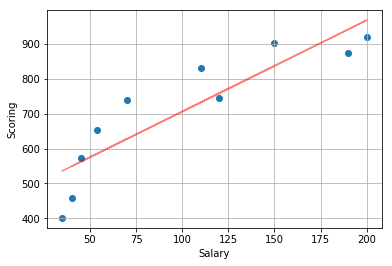

In [158]:
plt.scatter(dat["Salary"].values, dat["Scoring"].values)
plt.plot(dat["Salary"].values, dat["Salary"].values*b[1] + b[0],  color='red', alpha=0.5)

plt.xlabel('Salary')
plt.ylabel('Scoring')
    
plt.grid()
plt.show()

3. коэффициент детерминации и средняя ошибка аппроксимации

коэффициент детерминации:

In [150]:
z1 = b[0] + b[1] * dat["Salary"]

for i in range(dat.shape[0]):
    print("real: {} pred: {:.2f} diff: {:.2f}".format(dat["Scoring"].values[i], z1.values[i], dat["Scoring"].values[i]-z1.values[i]))

R1 = 1 - (z1 - dat["Scoring"]).var() / dat["Scoring"].var()
R1

real: 401 pred: 535.90 diff: -134.90
real: 574 pred: 562.10 diff: 11.90
real: 874 pred: 942.08 diff: -68.08
real: 919 pred: 968.29 diff: -49.29
real: 459 pred: 549.00 diff: -90.00
real: 739 pred: 627.62 diff: 111.38
real: 653 pred: 585.69 diff: 67.31
real: 902 pred: 837.26 diff: 64.74
real: 746 pred: 758.64 diff: -12.64
real: 832 pred: 732.44 diff: 99.56


0.7876386635293685

средняя ошибка аппроксимации:

In [140]:
mean_approximation_error(dat["Scoring"].values, z1.values)

0.11469251843561712

4. F-критерий Фишера

In [159]:
k1 = 1
k2 = dat.shape[0] - k1 - 1

F1 = (R1 / k1) / ((1 - R1) / k2)
F1

29.67164085966449

In [143]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

Уравнение регрессии статистически значимо

5. t-статистика Стьюдента

In [151]:
s_slope = standard_error_slope(dat["Salary"].values, dat["Scoring"].values, z1.values)
s_slope

0.48108279568516016

In [152]:
alpha = 0.05

t = stats.t.ppf(1 - alpha / 2, df=8)
t

2.3060041350333704

In [155]:
(b1 - t * s_slope, b1, b1 + t * s_slope)

(1.5111599662593715, 2.620538882402765, 3.7299177985461585)

In [156]:
s_intercept = standard_error_intercept(dat["Salary"].values, dat["Scoring"].values, z1.values)
s_intercept

56.466497550681545

In [157]:
(b0 - t * s_intercept, b0,  b0 + t * s_intercept)

(313.9653804816363, 444.1773573243596, 574.3893341670829)

## Задание №2

Допустим, первые 5 клиентов из предыдущего задания проживают в Москве, а остальные - в Санкт-Петербурге. Влияет ли этот фактор на значение их кредитного скоринга?

Безусловно влияет. В Москве и в Санкт-Петербурге существенно различаются уровни доходов и расходов. Различаеются профили потребления. Будут отличаться средние и дисперсии - параметры множеств смещены. 

## Задание №3

__Квартет Энскомба__ — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

```
{
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}
```

По каждой паре выборок посчитайте:

1. выборочное среднее и дисперсию каждой выборки,
2. коэффициент корреляции Пирсона и прямую линейной регрессии.

Убедившись в том, что они не практически не отличаются, постройте `scatter plot` по каждой паре выборок.

In [109]:
dic = {
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}

data = pd.DataFrame(dic)
data

,x1,y1,x2,y2,x3,y3,x4,y4
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


In [110]:
for ind in range(data.shape[1]):
    print("{}\tсреднее: {:.4f}\t\tдисперсия: {:.4f}".format(data.keys()[ind], data[data.keys()[ind]].mean(), data[data.keys()[ind]].var()))

x1	среднее: 9.0000		дисперсия: 11.0000
y1	среднее: 7.5009		дисперсия: 4.1273
x2	среднее: 9.0000		дисперсия: 11.0000
y2	среднее: 7.5009		дисперсия: 4.1276
x3	среднее: 9.0000		дисперсия: 11.0000
y3	среднее: 7.5000		дисперсия: 4.1226
x4	среднее: 9.0000		дисперсия: 11.0000
y4	среднее: 7.5009		дисперсия: 4.1232


In [111]:
for ind in range(0, data.shape[1], 2):
    print("{}/{} кэффициент корреляции Пирсона: {:.4f}".format(data.keys()[ind], data.keys()[ind+1], np.corrcoef(data[data.keys()[ind]].values, data[data.keys()[ind+1]].values)[0][1]))

x1/y1 кэффициент корреляции Пирсона: 0.8164
x2/y2 кэффициент корреляции Пирсона: 0.8162
x3/y3 кэффициент корреляции Пирсона: 0.8163
x4/y4 кэффициент корреляции Пирсона: 0.8165


In [112]:
for ind in range(0, data.shape[1], 2):
    print("{}/{} кэффициент корреляции Пирсона: {:.4f}".format(data.keys()[ind], data.keys()[ind+1], data[[data.keys()[ind], data.keys()[ind+1]]].corr().values[0][1]))

x1/y1 кэффициент корреляции Пирсона: 0.8164
x2/y2 кэффициент корреляции Пирсона: 0.8162
x3/y3 кэффициент корреляции Пирсона: 0.8163
x4/y4 кэффициент корреляции Пирсона: 0.8165


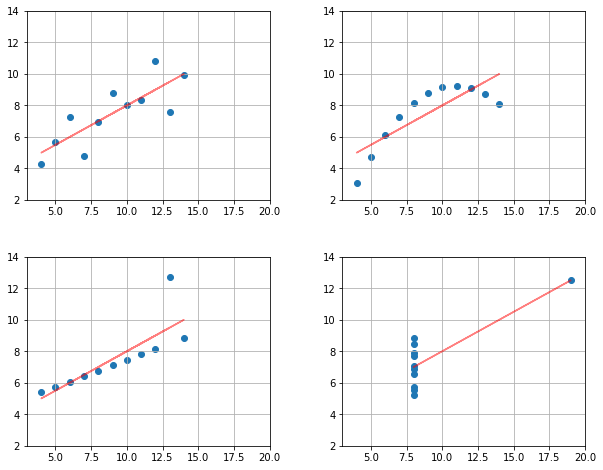

In [125]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

fig.set_size_inches(10, 8)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

for ind, axes in enumerate(ax.flatten()):
    b_1 = data[[data.keys()[ind*2], data.keys()[ind*2+1]]].cov().values[0][1]/data[data.keys()[ind*2]].var()
    b_0 = data[data.keys()[ind*2+1]].mean() - b_1 * data[data.keys()[ind*2]].mean()
    axes.scatter(data[data.keys()[ind*2]].values, data[data.keys()[ind*2+1]].values)
    axes.plot(data[data.keys()[ind*2]], data[data.keys()[ind*2]]*b_1 + b_0,  color='red', alpha=0.5)
    
    axes.set_xlim(3, 20)
    axes.set_ylim(2, 14)
    axes.grid()

plt.show()